In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Parsing FASTA File

In [2]:
def parse_fasta(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        content = file.read().strip()

    # Split the content by the '>' character, which marks the start of a new sequence
    entries = content.split('>')
    
    for entry in entries:
        if entry:
            # Split each entry into lines
            lines = entry.split('\n')
            # The first line is the header
            header = lines[0].strip()
            # The remaining lines are the sequence
            sequence = ''.join(lines[1:]).strip()
            # Append the header and sequence to the list as a tuple
            sequences.append((header, sequence.upper()))
    
    return sequences

In [3]:
# load sequence/FASTA data
sequences = parse_fasta('/Users/sham/Desktop/Dr. Hanson Research/DataSets/komagataella_phaffii_all_needed_data/ncbi_dataset/ncbi_dataset/data/GCF_000027005.1/GCF_000027005.1_ASM2700v1_genomic.fna')
# load GTF data
GTF_df = pd.read_csv('/Users/sham/Desktop/Dr. Hanson Research/DataSets/komagataella_phaffii_all_needed_data/ncbi_dataset/ncbi_dataset/data/GCF_000027005.1/genomic.gtf', sep='\t', comment='#', header=None)

In [36]:
GTF_df[:10]

,0,1,2,3,4,5,6,7,8
0,NC_012963.1,RefSeq,gene,5018,6499,.,+,.,"gene_id ""PAS_chr1-3_0003""; transcript_id """"; d..."
1,NC_012963.1,RefSeq,transcript,5018,6499,.,+,.,"gene_id ""PAS_chr1-3_0003""; transcript_id ""XM_0..."
2,NC_012963.1,RefSeq,exon,5018,6499,.,+,.,"gene_id ""PAS_chr1-3_0003""; transcript_id ""XM_0..."
3,NC_012963.1,RefSeq,CDS,5018,6496,.,+,0,"gene_id ""PAS_chr1-3_0003""; transcript_id ""XM_0..."
4,NC_012963.1,RefSeq,start_codon,5018,5020,.,+,0,"gene_id ""PAS_chr1-3_0003""; transcript_id ""XM_0..."
5,NC_012963.1,RefSeq,stop_codon,6497,6499,.,+,0,"gene_id ""PAS_chr1-3_0003""; transcript_id ""XM_0..."
6,NC_012963.1,RefSeq,gene,10239,11735,.,-,.,"gene_id ""PAS_chr1-3_0004""; transcript_id """"; d..."
7,NC_012963.1,RefSeq,transcript,10239,11735,.,-,.,"gene_id ""PAS_chr1-3_0004""; transcript_id ""XM_0..."
8,NC_012963.1,RefSeq,exon,10239,11735,.,-,.,"gene_id ""PAS_chr1-3_0004""; transcript_id ""XM_0..."
9,NC_012963.1,RefSeq,CDS,10242,11735,.,-,0,"gene_id ""PAS_chr1-3_0004""; transcript_id ""XM_0..."


In [6]:
# Pre-process GTF dataframe as per need
# GTF_all_gene = GTF_df[GTF_df[2].isin(['start_codon', 'stop_codon'])]

# GTF_chr1_gene = GTF_all_gene[GTF_all_gene[0] == 'NC_089378.1']
# GTF_chr2_gene = GTF_all_gene[GTF_all_gene[0] == 'NC_089379.1']
# GTF_chr3_gene = GTF_all_gene[GTF_all_gene[0] == 'NC_089380.1']
# GTF_chr4_gene = GTF_all_gene[GTF_all_gene[0] == 'NC_089381.1']
# GTF_chr5_gene = GTF_all_gene[GTF_all_gene[0] == 'NC_089382.1']
# GTF_chr6_gene = GTF_all_gene[GTF_all_gene[0] == 'NC_089383.1']

In [7]:
def complement_seq(seq):
    seq_list = list(seq)

    for i in range(len(seq_list)):
        if seq_list[i] == 'A':
            seq_list[i] = 'T'
        elif seq_list[i] == 'T':
            seq_list[i] = 'A'
        elif seq_list[i] == 'G':
            seq_list[i] = 'C'
        else:
            seq_list[i] = 'G'
    return ''.join(seq_list)

In [8]:
# reset indexing
def reset_df(df):
    out_df = df.reset_index()
    out_df = out_df.drop('index', axis=1)
    return out_df

# Get gene and CDS data only
GTF_gene_and_cds = GTF_df[GTF_df[2].isin(['CDS', 'gene'])]
GTF_gene_and_cds = reset_df(GTF_gene_and_cds)

def filter_irregular_gene(df):
    to_drop = []
    for i in range(len(df)):
        if (df.iloc[i,8][21] == 't' or df.iloc[i,8][21] == 'r'):
            to_drop.append(i)
    df = df.drop(to_drop)
    df = reset_df(df)

    print('to drop: ', to_drop)

    return df
    

# separate by chromosome and filter irregular gene
# filter_irregular_gene() doesn't do anything for K. phaffi - was made for Y. lipolytoca
GTF_chr1_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'NC_012963.1']))
GTF_chr2_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'NC_012964.1']))
GTF_chr3_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'NC_012965.1']))
GTF_chr4_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'NC_012966.1']))

# GTF_chr1_gene_cds[:30]

to drop:  []
to drop:  []
to drop:  []
to drop:  []


In [9]:
def get_cds_gene_idx(seq, gtf):
    
    # list of indexes list that have the strand info and all the cds indexes of a gene
    # example: [['+', 1], ['-', 3, 4, 5], ['-', 7, 8, 9, 10], ['+', 12], ['+', 14], ...]
    gene_cds_idx = []
    ind_idx = ['x']
    for i in range(1, len(gtf)):
        if (gtf.iloc[i,2] != 'gene'):
            ind_idx.append(i)
            ind_idx[0] = gtf.iloc[i,6]
        elif (gtf.iloc[i,2] == 'gene'):
            gene_cds_idx.append(ind_idx)
            ind_idx = ['x']
    gene_cds_idx.append(ind_idx)

    gene_cds_sequences = []
    for cds_range in gene_cds_idx:
        seq_str = ''
        frame_skip = 0
        if cds_range[0] == '+':
            for idx in cds_range[1:]:
                frame_skip = int(gtf.iloc[idx,7])
                seq_str += seq[gtf.iloc[idx,3]-1+frame_skip : gtf.iloc[idx,4]]
                frame_skip = 0
            gene_cds_sequences.append(seq_str)
        elif cds_range[0] == '-':
            for idx in cds_range[1:]:
                frame_skip = int(gtf.iloc[idx,7])
                seq_str += complement_seq(seq[gtf.iloc[idx,3]-1 : gtf.iloc[idx,4]-frame_skip])[::-1]
                frame_skip = 0
            gene_cds_sequences.append(seq_str)
    
    return gene_cds_sequences


def calc_gc3_pct(gene_seqs, window):
    pct_arr = []
    for seq in gene_seqs:
        codon3_ct = 0
        gc3_ct = 0
        for i in range(2,len(seq),3):
            if (seq[i] == 'G' or seq[i] == 'C'):
                gc3_ct += 1
            codon3_ct += 1
        pct_arr.append((gc3_ct / codon3_ct) * 100)
    
    window_pct_arr = []
    for i in range(len(pct_arr)-window+1):
        window_range = pct_arr[i:i + window]
        window_avg = sum(window_range) / window
        window_pct_arr.append(window_avg)
    
    return window_pct_arr

In [10]:
chr1_gene_cds_seqs = get_cds_gene_idx(sequences[0][1], GTF_chr1_gene_cds)
chr2_gene_cds_seqs = get_cds_gene_idx(sequences[1][1], GTF_chr2_gene_cds)
chr3_gene_cds_seqs = get_cds_gene_idx(sequences[2][1], GTF_chr3_gene_cds)
chr4_gene_cds_seqs = get_cds_gene_idx(sequences[3][1], GTF_chr4_gene_cds)

win_size = 30

chr1_gc3_pcts = calc_gc3_pct(chr1_gene_cds_seqs, win_size)
chr2_gc3_pcts = calc_gc3_pct(chr2_gene_cds_seqs, win_size)
chr3_gc3_pcts = calc_gc3_pct(chr3_gene_cds_seqs, win_size)
chr4_gc3_pcts = calc_gc3_pct(chr4_gene_cds_seqs, win_size)

In [37]:
sequences[0][1][:10]

'CATCCAGCAT'

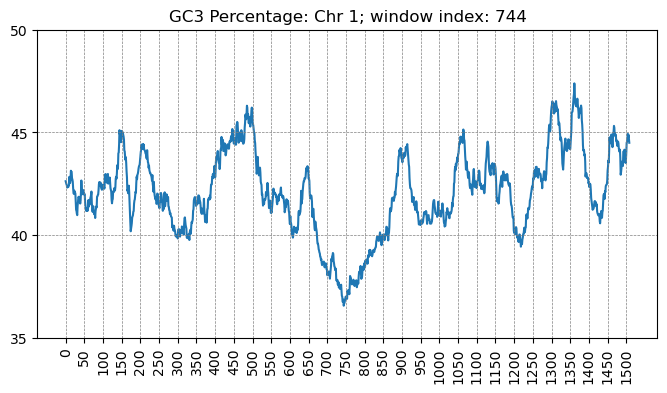

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(chr1_gc3_pcts)

# Title with the location of minimum GC3 percentage
plt.title('GC3 Percentage: Chr 1; window index: ' + str(chr1_gc3_pcts.index(min(chr1_gc3_pcts))))

# Setting the y-axis limits and ticks
plt.ylim(35, 50)
plt.yticks([35, 40, 45, 50])

# Adding horizontal lines at y-tick positions
for y in [35, 40, 45, 50]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Adding x-ticks every 50 intervals
xticks = range(0, len(chr1_gc3_pcts), 50)
plt.xticks(xticks, rotation=90)  # Rotating x-ticks vertically

# Adding vertical lines at each x-tick
for x in xticks:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

plt.show()

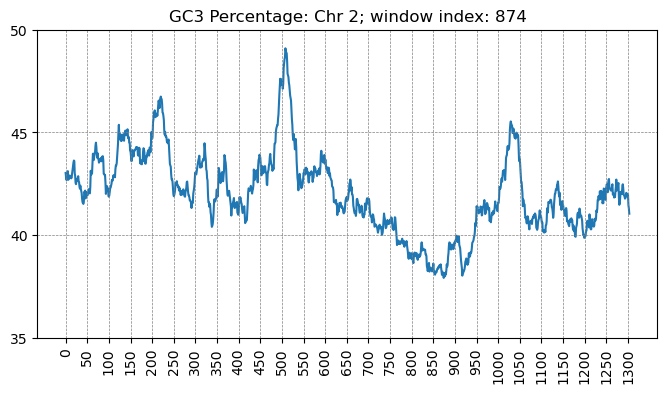

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(chr2_gc3_pcts)

# Title with the location of minimum GC3 percentage
plt.title('GC3 Percentage: Chr 2; window index: ' + str(chr2_gc3_pcts.index(min(chr2_gc3_pcts))))

# Setting the y-axis limits and ticks
plt.ylim(35, 50)
plt.yticks([35, 40, 45, 50])

# Adding horizontal lines at y-tick positions
for y in [35, 40, 45, 50]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Adding x-ticks every 50 intervals
xticks = range(0, len(chr2_gc3_pcts), 50)
plt.xticks(xticks, rotation=90)  # Rotating x-ticks vertically

# Adding vertical lines at each x-tick
for x in xticks:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

plt.show()

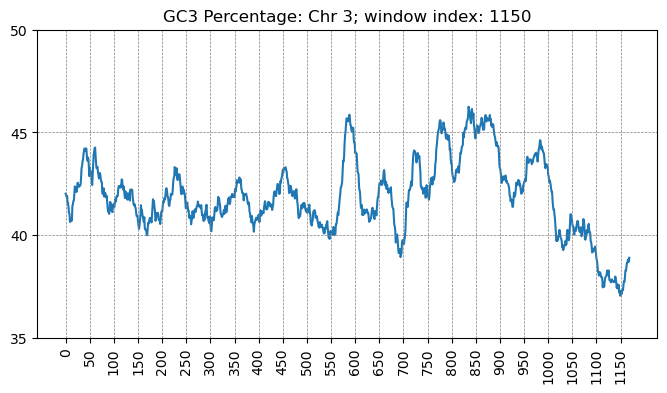

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(chr3_gc3_pcts)

# Title with the location of minimum GC3 percentage
plt.title('GC3 Percentage: Chr 3; window index: ' + str(chr3_gc3_pcts.index(min(chr3_gc3_pcts))))

# Setting the y-axis limits and ticks
plt.ylim(35, 50)
plt.yticks([35, 40, 45, 50])

# Adding horizontal lines at y-tick positions
for y in [35, 40, 45, 50]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Adding x-ticks every 50 intervals
xticks = range(0, len(chr3_gc3_pcts), 50)
plt.xticks(xticks, rotation=90)  # Rotating x-ticks vertically

# Adding vertical lines at each x-tick
for x in xticks:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

plt.show()

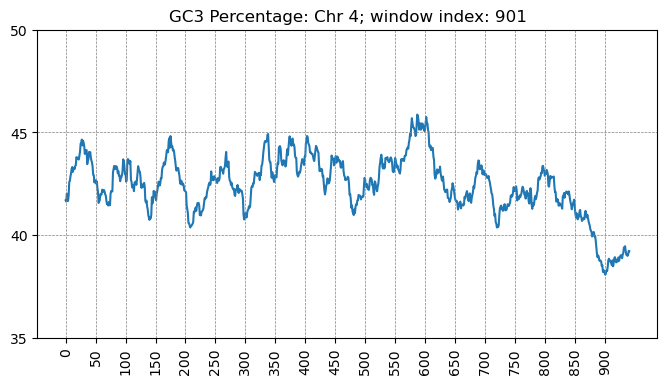

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(chr4_gc3_pcts)

# Title with the location of minimum GC3 percentage
plt.title('GC3 Percentage: Chr 4; window index: ' + str(chr4_gc3_pcts.index(min(chr4_gc3_pcts))))

# Setting the y-axis limits and ticks
plt.ylim(35, 50)
plt.yticks([35, 40, 45, 50])

# Adding horizontal lines at y-tick positions
for y in [35, 40, 45, 50]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Adding x-ticks every 50 intervals
xticks = range(0, len(chr4_gc3_pcts), 50)
plt.xticks(xticks, rotation=90)  # Rotating x-ticks vertically

# Adding vertical lines at each x-tick
for x in xticks:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

plt.show()

# Find Largest Intergenic Region

In [15]:
GTF_chr1_gene_cds[:10]

,0,1,2,3,4,5,6,7,8
0,NC_012963.1,RefSeq,gene,5018,6499,.,+,.,"gene_id ""PAS_chr1-3_0003""; transcript_id """"; d..."
1,NC_012963.1,RefSeq,CDS,5018,6496,.,+,0,"gene_id ""PAS_chr1-3_0003""; transcript_id ""XM_0..."
2,NC_012963.1,RefSeq,gene,10239,11735,.,-,.,"gene_id ""PAS_chr1-3_0004""; transcript_id """"; d..."
3,NC_012963.1,RefSeq,CDS,10242,11735,.,-,0,"gene_id ""PAS_chr1-3_0004""; transcript_id ""XM_0..."
4,NC_012963.1,RefSeq,gene,12198,13325,.,+,.,"gene_id ""PAS_chr1-3_0005""; transcript_id """"; d..."
5,NC_012963.1,RefSeq,CDS,12198,13322,.,+,0,"gene_id ""PAS_chr1-3_0005""; transcript_id ""XM_0..."
6,NC_012963.1,RefSeq,gene,14951,15364,.,-,.,"gene_id ""PAS_chr1-3_0008""; transcript_id """"; d..."
7,NC_012963.1,RefSeq,CDS,14954,15364,.,-,0,"gene_id ""PAS_chr1-3_0008""; transcript_id ""XM_0..."
8,NC_012963.1,RefSeq,gene,17266,19083,.,+,.,"gene_id ""PAS_chr1-3_0010""; transcript_id """"; d..."
9,NC_012963.1,RefSeq,CDS,17266,19080,.,+,0,"gene_id ""PAS_chr1-3_0010""; transcript_id ""XM_0..."


In [16]:
GTF_gene_only = GTF_df[GTF_df[2].isin(['gene'])]
GTF_gene_only = reset_df(GTF_gene_only)

# separate by chromosome and filter irregular gene
# filter_irregular_gene() doesn't do anything for K. phaffi - was made for Y. lipolytoca
GTF_chr1_gene = (reset_df(GTF_gene_only[GTF_gene_only[0] == 'NC_012963.1']))
GTF_chr2_gene = (reset_df(GTF_gene_only[GTF_gene_only[0] == 'NC_012964.1']))
GTF_chr3_gene = (reset_df(GTF_gene_only[GTF_gene_only[0] == 'NC_012965.1']))
GTF_chr4_gene = (reset_df(GTF_gene_only[GTF_gene_only[0] == 'NC_012966.1']))


In [17]:
GTF_chr1_gene[:10]

,0,1,2,3,4,5,6,7,8
0,NC_012963.1,RefSeq,gene,5018,6499,.,+,.,"gene_id ""PAS_chr1-3_0003""; transcript_id """"; d..."
1,NC_012963.1,RefSeq,gene,10239,11735,.,-,.,"gene_id ""PAS_chr1-3_0004""; transcript_id """"; d..."
2,NC_012963.1,RefSeq,gene,12198,13325,.,+,.,"gene_id ""PAS_chr1-3_0005""; transcript_id """"; d..."
3,NC_012963.1,RefSeq,gene,14951,15364,.,-,.,"gene_id ""PAS_chr1-3_0008""; transcript_id """"; d..."
4,NC_012963.1,RefSeq,gene,17266,19083,.,+,.,"gene_id ""PAS_chr1-3_0010""; transcript_id """"; d..."
5,NC_012963.1,RefSeq,gene,19282,20943,.,-,.,"gene_id ""PAS_chr1-3_0011""; transcript_id """"; d..."
6,NC_012963.1,RefSeq,gene,24468,25064,.,+,.,"gene_id ""PAS_chr1-3_0013""; transcript_id """"; d..."
7,NC_012963.1,RefSeq,gene,25978,27354,.,+,.,"gene_id ""PAS_chr1-3_0014""; transcript_id """"; d..."
8,NC_012963.1,RefSeq,gene,27496,29475,.,-,.,"gene_id ""PAS_chr1-3_0015""; transcript_id """"; d..."
9,NC_012963.1,RefSeq,gene,29840,30607,.,+,.,"gene_id ""PAS_chr1-3_0016""; transcript_id """"; d..."


In [18]:
GTF_chr1_gene.iloc[0,4]

6499

In [19]:
def get_n_largest_ig_region(df, n_window, window_size):
    largest_regions = [(-1, 0) for i in range(window_size)]

    adjusment = 0
    if (n_window + window_size -1) - len(df) > 0:
        print('here')
        adjusment = (n_window + window_size -1) - len(df) + 1

    for i in range(n_window - window_size +1 , n_window + window_size -1 - adjusment):
        for idx, r in enumerate(largest_regions):
            if (df.iloc[i+1,3] - df.iloc[i,4]) > r[0]:
                largest_regions[idx] = ((df.iloc[i+1,3] - df.iloc[i,4]), i)
                largest_regions = sorted(largest_regions, key=lambda x: x[0])
                break
    return largest_regions

# lg = get_n_largest_ig_region(GTF_chr1_gene, chr1_gc3_pcts.index(min(chr1_gc3_pcts)), win_size)
# print(lg)

In [20]:
scan_range = 60

largest_IG_chr1 = get_n_largest_ig_region(GTF_chr1_gene,chr1_gc3_pcts.index(min(chr1_gc3_pcts)), scan_range)
largest_IG_chr2 = get_n_largest_ig_region(GTF_chr2_gene,chr2_gc3_pcts.index(min(chr2_gc3_pcts)), scan_range)
largest_IG_chr3 = get_n_largest_ig_region(GTF_chr3_gene,chr3_gc3_pcts.index(min(chr3_gc3_pcts)), scan_range)
largest_IG_chr4 = get_n_largest_ig_region(GTF_chr4_gene,chr4_gc3_pcts.index(min(chr4_gc3_pcts)), scan_range)

here


In [21]:
print(largest_IG_chr1[-5:])

[(2132, 695), (2516, 762), (3762, 771), (4998, 772), (9411, 802)]


In [22]:
print(largest_IG_chr2[-5:])

[(1612, 843), (1754, 889), (1774, 887), (1888, 916), (10411, 861)]


In [23]:
print(largest_IG_chr3[-5:])

[(1310, 1196), (3862, 1195), (4091, 1126), (4770, 1093), (8734, 1177)]


In [24]:
print(largest_IG_chr4[-5:])

[(2248, 861), (2666, 875), (3248, 919), (3309, 946), (25922, 945)]


Largest IG across the whole chromosomes

In [25]:
def whole_chr_get_n_largest_ig_region(df, window_size):
    largest_regions = [(-1, 0) for i in range(window_size)]
    # cadidates = 0
    for i in range(len(df)-1):
        # cadidates += 1
        for idx, r in enumerate(largest_regions):
            if (df.iloc[i+1,3] - df.iloc[i,4]) > r[0]:
                largest_regions[idx] = ((df.iloc[i+1,3] - df.iloc[i,4]), i)
                largest_regions = sorted(largest_regions, key=lambda x: x[0])
                break
    return largest_regions

In [26]:
whole_largest_IG_chr1 = whole_chr_get_n_largest_ig_region(GTF_chr1_gene, win_size)
print(whole_largest_IG_chr1[-5:])

[(3762, 771), (4434, 286), (4615, 372), (4998, 772), (9411, 802)]


In [27]:
whole_largest_IG_chr2 = whole_chr_get_n_largest_ig_region(GTF_chr2_gene, win_size)
print(whole_largest_IG_chr2[-5:])

[(3124, 8), (3655, 1060), (4247, 1327), (7727, 561), (10411, 861)]


In [28]:
whole_largest_IG_chr3 = whole_chr_get_n_largest_ig_region(GTF_chr3_gene, win_size)
print(whole_largest_IG_chr3[-5:])

[(6626, 122), (8734, 1177), (9117, 944), (9270, 818), (12730, 154)]


In [29]:
whole_largest_IG_chr4 = whole_chr_get_n_largest_ig_region(GTF_chr4_gene, win_size)
print(whole_largest_IG_chr4[-10:])

[(3248, 919), (3309, 946), (3326, 798), (3326, 0), (3398, 233), (3894, 600), (5965, 160), (8432, 90), (9610, 10), (25922, 945)]


In [30]:
GTF_chr4_gene[943:948]

,0,1,2,3,4,5,6,7,8
943,NC_012966.1,RefSeq,gene,1697020,1697535,.,+,.,"gene_id ""PAS_chr4_0906""; transcript_id """"; db_..."
944,NC_012966.1,RefSeq,gene,1697639,1698541,.,-,.,"gene_id ""PAS_chr4_0907""; transcript_id """"; db_..."
945,NC_012966.1,RefSeq,gene,1698697,1700475,.,-,.,"gene_id ""PAS_chr4_0908""; transcript_id """"; db_..."
946,NC_012966.1,RefSeq,gene,1726397,1728327,.,-,.,"gene_id ""PAS_FragD_0029""; transcript_id """"; db..."
947,NC_012966.1,RefSeq,gene,1731636,1732076,.,+,.,"gene_id ""PAS_FragD_0027""; transcript_id """"; db..."


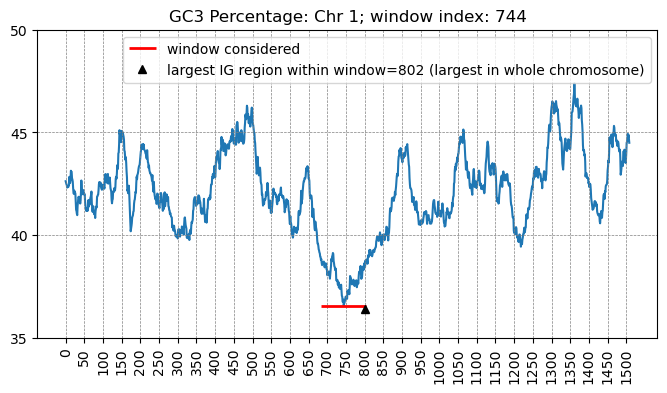

In [31]:
import matplotlib.pyplot as plt

# Assuming chr1_gc3_pcts is already defined

plt.figure(figsize=(8, 4))
plt.plot(chr1_gc3_pcts)

# Get the index of the minimum GC3 percentage
min_index = chr1_gc3_pcts.index(min(chr1_gc3_pcts))

# Title with the location of minimum GC3 percentage
plt.title('GC3 Percentage: Chr 1; window index: ' + str(min_index))

# Setting the y-axis limits and ticks
plt.ylim(35, 50)
plt.yticks([35, 40, 45, 50])

# Adding horizontal lines at y-tick positions
for y in [35, 40, 45, 50]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Adding x-ticks every 50 intervals
xticks = range(0, len(chr1_gc3_pcts), 50)
plt.xticks(xticks, rotation=90)

# Adding vertical lines at each x-tick
for x in xticks:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

# Adding a horizontal line 60 units long at the index of the minimum value
plt.hlines(y=min(chr1_gc3_pcts), xmin=max(min_index - 60, 0), xmax=(min_index + 60), color='red', linewidth=2, label='window considered')


# Plotting a point at x = 802 along the horizontal line at the min GC3 percentage
plt.plot(802, min(chr1_gc3_pcts)-.15, '^', markersize=6, label='largest IG region within window=802 (largest in whole chromosome)', color='black')

# Adding a legend to indicate the point
plt.legend()

plt.show()


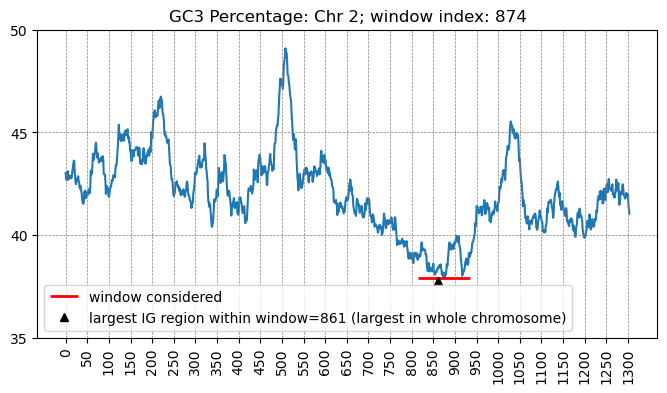

In [32]:
import matplotlib.pyplot as plt

# Assuming chr1_gc3_pcts is already defined

plt.figure(figsize=(8, 4))
plt.plot(chr2_gc3_pcts)

# Get the index of the minimum GC3 percentage
min_index = chr2_gc3_pcts.index(min(chr2_gc3_pcts))

# Title with the location of minimum GC3 percentage
plt.title('GC3 Percentage: Chr 2; window index: ' + str(min_index))

# Setting the y-axis limits and ticks
plt.ylim(35, 50)
plt.yticks([35, 40, 45, 50])

# Adding horizontal lines at y-tick positions
for y in [35, 40, 45, 50]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Adding x-ticks every 50 intervals
xticks = range(0, len(chr2_gc3_pcts), 50)
plt.xticks(xticks, rotation=90)

# Adding vertical lines at each x-tick
for x in xticks:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

# Adding a horizontal line 60 units long at the index of the minimum value
plt.hlines(y=min(chr2_gc3_pcts), xmin=max(min_index - 60, 0), xmax=(min_index + 60), color='red', linewidth=2, label='window considered')


# Plotting a point at x = 802 along the horizontal line at the min GC3 percentage
plt.plot(861, min(chr2_gc3_pcts)-.15, '^', markersize=6, label='largest IG region within window=861 (largest in whole chromosome)', color='black')

# Adding a legend to indicate the point
plt.legend()

plt.show()


In [33]:
min(min_index + 60, len(chr3_gc3_pcts) - 1)
min_index + 60

934

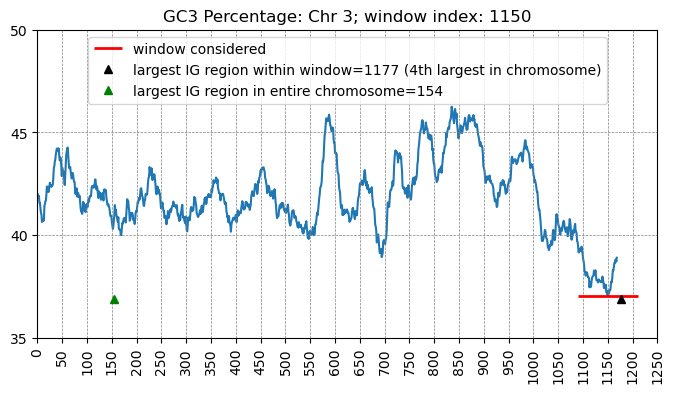

In [34]:
import matplotlib.pyplot as plt

# Assuming chr3_gc3_pcts is already defined

plt.figure(figsize=(8, 4))
plt.plot(chr3_gc3_pcts)

# Get the index of the minimum GC3 percentage
min_index = chr3_gc3_pcts.index(min(chr3_gc3_pcts))

# Title with the location of minimum GC3 percentage
plt.title('GC3 Percentage: Chr 3; window index: ' + str(min_index))

# Setting the y-axis limits and ticks
plt.ylim(35, 50)
plt.yticks([35, 40, 45, 50])

# Adding horizontal lines at y-tick positions
for y in [35, 40, 45, 50]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Adding x-ticks every 50 intervals, up to 1200
xticks = range(0, 1251, 50)
plt.xticks(xticks, rotation=90)

# Adding vertical lines at each x-tick
for x in xticks:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

# Extending the x-axis to go up to 1200
plt.xlim(0, 1250)

# Adding a horizontal line 60 units long at the index of the minimum value
plt.hlines(y=min(chr3_gc3_pcts), xmin=max(min_index - 60, 0), xmax=(min_index + 60), color='red', linewidth=2, label='window considered')

# Plotting a point at x = 1177 along the horizontal line at the min GC3 percentage
plt.plot(1177, min(chr3_gc3_pcts)-.15, '^', markersize=6, label='largest IG region within window=1177 (4th largest in chromosome)', color='black')
plt.plot(154, min(chr3_gc3_pcts)-.15, '^', markersize=6, label='largest IG region in entire chromosome=154', color='green')

# Adding a legend to indicate the point
plt.legend()

plt.show()


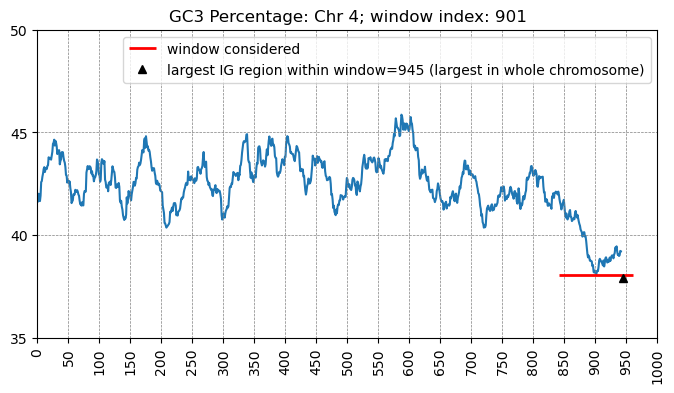

In [35]:
import matplotlib.pyplot as plt

# Assuming chr3_gc3_pcts is already defined

plt.figure(figsize=(8, 4))
plt.plot(chr4_gc3_pcts)

# Get the index of the minimum GC3 percentage
min_index = chr4_gc3_pcts.index(min(chr4_gc3_pcts))

# Title with the location of minimum GC3 percentage
plt.title('GC3 Percentage: Chr 4; window index: ' + str(min_index))

# Setting the y-axis limits and ticks
plt.ylim(35, 50)
plt.yticks([35, 40, 45, 50])

# Adding horizontal lines at y-tick positions
for y in [35, 40, 45, 50]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Adding x-ticks every 50 intervals, up to 1200
xticks = range(0, 1001, 50)
plt.xticks(xticks, rotation=90)

# Adding vertical lines at each x-tick
for x in xticks:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

# Extending the x-axis to go up to 1200
plt.xlim(0, 1000)

# Adding a horizontal line 60 units long at the index of the minimum value
plt.hlines(y=min(chr4_gc3_pcts), xmin=max(min_index - 60, 0), xmax=(min_index + 60), color='red', linewidth=2, label='window considered')

# Plotting a point at x = 1177 along the horizontal line at the min GC3 percentage
plt.plot(945, min(chr4_gc3_pcts)-.15, '^', markersize=6, label='largest IG region within window=945 (largest in whole chromosome)', color='black')

# Adding a legend to indicate the point
plt.legend()

plt.show()
